<a href="https://colab.research.google.com/github/FereshtehRD/DataScience2/blob/FereshtehRD-homework1/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Build training and test sets based on this digits dataset (https://scikit-learn.org/stable/datasets/index.html#digits-dataset) for a binary classification task. For instance,use the 70/30 split to divide the shuffled dataset into the training and test sets. From the trainingset, collect samples of one digit (e.g., 9, assume we haveNimages in this class) and then randomlysample the same number of images (Nimages) from the training data of all other digits ( not 9)to balance the positive and negative samples. Use the test set or randomly sampleNimages fromit for evaluation. 

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np

In [ ]:
# 1. Building Training/Testing data sets
(X, y) = load_digits(return_X_y=True)
df = pd.DataFrame(X)
df['class'] = y
print(df.head())
print(df['class'].describe())

     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  class  
0  6.0  13.0  10.0   0.0  0.0  0.0      0  
1  0.0  11.0  16.0  10.0  0.0  0.0      1  
2  0.0   3.0  11.0  16.0  9.0  0.0      2  
3  7.0  13.0  13.0   9.0  0.0  0.0      3  
4  0.0   2.0  16.0   4.0  0.0  0.0      4  

[5 rows x 65 columns]
count    1797.000000
mean        4.490818
std         2.865304
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: class, dtype: float64


In [ ]:
df_7 = df.loc[df['class']==7]
df_7['class'] = 1
print(df_7.head())
print(len(df_7))

      0    1    2     3     4     5     6    7    8    9  ...   55   56   57  \
7   0.0  0.0  7.0   8.0  13.0  16.0  15.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
17  0.0  0.0  1.0   8.0  15.0  10.0   0.0  0.0  0.0  3.0  ...  0.0  0.0  0.0   
27  0.0  0.0  0.0   8.0  14.0  14.0   2.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
43  0.0  0.0  0.0   9.0  15.0  12.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
44  0.0  0.0  9.0  16.0  16.0  16.0   5.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   

      58    59    60   61   62   63  class  
7   13.0   5.0   0.0  0.0  0.0  0.0      1  
17   0.0  11.0   9.0  0.0  0.0  0.0      1  
27   0.0  12.0  13.0  1.0  0.0  0.0      1  
43   0.0  11.0   7.0  0.0  0.0  0.0      1  
44  13.0  10.0   0.0  0.0  0.0  0.0      1  

[5 rows x 65 columns]
179


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# We see we have 65 columns, we now have to get a random sample of numbers that aren't 7.
df_n7 = df.loc[df['class']!=7].sample(n=len(df_7))
df_n7['class'] = 0
print(df_n7.head())
assert(len(df_7) == len(df_n7))

        0    1    2     3     4    5    6    7    8    9  ...   55   56   57  \
621   0.0  0.0  2.0  11.0  13.0  4.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
737   0.0  0.0  7.0  15.0  12.0  0.0  0.0  0.0  0.0  3.0  ...  0.0  0.0  0.0   
1615  0.0  0.0  0.0   9.0   8.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
385   0.0  1.0  9.0  15.0  16.0  9.0  0.0  0.0  0.0  6.0  ...  0.0  0.0  0.0   
810   0.0  0.0  6.0  13.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       58    59    60    61   62   63  class  
621   4.0  10.0  15.0  15.0  3.0  0.0      0  
737   5.0  13.0   9.0   1.0  0.0  0.0      0  
1615  0.0   7.0  14.0   9.0  0.0  0.0      0  
385   9.0  16.0  16.0  10.0  0.0  0.0      0  
810   4.0  15.0  16.0  13.0  2.0  0.0      0  

[5 rows x 65 columns]


In [ ]:
from sklearn.model_selection import train_test_split

df_balanced = pd.concat([df_7, df_n7])

df_train, df_test = train_test_split(df_balanced, test_size=0.3)

print(df_train)
print(df_test)

        0    1     2     3     4     5     6    7    8    9  ...   55   56  \
942   0.0  0.0   6.0  14.0  15.0   7.0   0.0  0.0  0.0  3.0  ...  0.0  0.0   
1238  0.0  1.0  13.0  16.0  16.0  12.0   0.0  0.0  0.0  3.0  ...  0.0  0.0   
624   0.0  0.0   4.0  13.0  16.0  14.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
137   0.0  0.0   2.0  15.0  15.0   3.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
979   0.0  0.0  13.0  16.0  11.0   0.0   0.0  0.0  0.0  2.0  ...  5.0  0.0   
...   ...  ...   ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...   
1259  0.0  7.0  16.0  16.0  16.0  16.0  11.0  0.0  0.0  8.0  ...  0.0  0.0   
892   0.0  0.0  10.0  15.0  13.0   1.0   0.0  0.0  0.0  4.0  ...  0.0  0.0   
1174  0.0  0.0   5.0  13.0  16.0  16.0   6.0  0.0  0.0  0.0  ...  0.0  0.0   
1269  0.0  0.0   5.0  12.0  16.0  16.0   7.0  0.0  0.0  0.0  ...  0.0  0.0   
803   0.0  0.0   8.0  16.0  16.0  11.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   

       57    58    59    60    61    62    63  class  
942   0.

In [ ]:
X_train = df_train.drop('class', axis=1).values
y_train = df_train['class'].values

X_test = df_test.drop('class', axis=1).values
y_test = df_test['class'].values

The following four algorithms on the dataset you built. You could use built-in functionsin an existing package (e.g., Scikit-learn). •Logistic regression•k Nearest Neighbor (kNN)•Support Vector Machine (SVM)•Naïve Bayes

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)

LR.score(X_test, y_test)

0.9629629629629629

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train, y_train)

KNN.score(X_test, y_test)

1.0

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

SVM = SVC(kernel='poly', gamma='auto').fit(X_train, y_train)
SVM.score(X_test, y_test)

0.9814814814814815

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB().fit(X_train, y_train)

NB.score(X_test, y_test)

0.9537037037037037

Compare the above four algorithms using the confusion matrix, F1 score, and the ROC curve.



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

### Logistic Regression

Confusion matrix:
[[46  2]
 [ 2 58]]

F1 Score: 0.9666666666666667



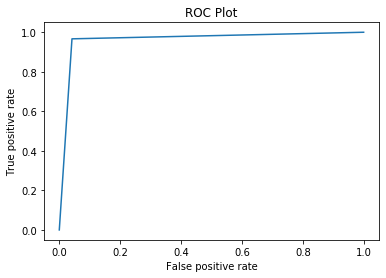

In [ ]:
y_pred = LR.predict(X_test)

print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(f"F1 Score: {f1_score(y_test, y_pred)}\n")

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.title("ROC Plot")
plt.show()

### KNN

Confusion matrix:
[[48  0]
 [ 0 60]]

F1 Score: 1.0



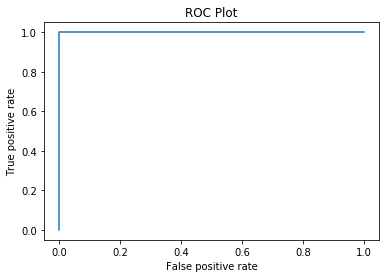

In [ ]:
y_pred = KNN.predict(X_test)

print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(f"F1 Score: {f1_score(y_test, y_pred)}\n")

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.title("ROC Plot")
plt.show()

### Support Vector Machine

Confusion matrix:
[[46  2]
 [ 0 60]]

F1 Score: 0.9836065573770492



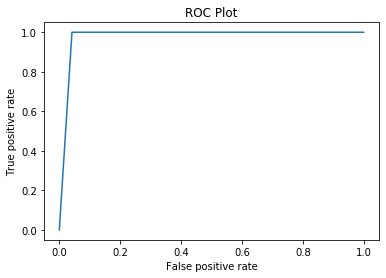

In [ ]:
y_pred = SVM.predict(X_test)

print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(f"F1 Score: {f1_score(y_test, y_pred)}\n")

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.title("ROC Plot")
plt.show()

### Naive Bayes

Confusion matrix:
[[44  4]
 [ 1 59]]

F1 Score: 0.9593495934959351



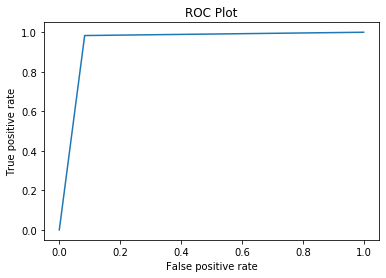

In [ ]:
y_pred = NB.predict(X_test)

print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(f"F1 Score: {f1_score(y_test, y_pred)}\n")

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.title("ROC Plot")
plt.show()

Perform regression on the Boston housing dataset provided by scikit-learn (https://scikit-learn.org/stable/datasets/index.html#toy-datasets). You could use built-in function in a packageor write your own code for implementing the following regression methods.(i) Use simple linear regression to find the relationship between RM and MEDV. (ii) Use multiple linear regression to estimate the MEDV as a function of RM and AGE. (iii) Evaluate the above two methods using the root mean square errors (RMSE) and the R2score. 

In [ ]:
from sklearn.datasets import load_boston

bunch = load_boston()

df= pd.DataFrame(bunch['data'], columns=bunch['feature_names'])
df['MEDV'] = bunch['target']
print(df.head())
print(df.columns)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [ ]:
import statsmodels.api as sm

X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Thu, 08 Oct 2020   Prob (F-statistic):                   3.74e-256
Time:                        18:20:50   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### ii) Multiple Linear Regression

In [ ]:
X2 = df[['RM', 'AGE']].values
y2 = df['MEDV'].values
model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              3004.
Date:                Thu, 08 Oct 2020   Prob (F-statistic):                   8.88e-281
Time:                        18:20:59   Log-Likelihood:                         -1685.7
No. Observations:                 506   AIC:                                      3375.
Df Residuals:                     504   BIC:                                      3384.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### iii) Evaluate

In [ ]:
from statsmodels.tools.eval_measures import rmse

# Get RMSE
predictions = model.predict(X)

print(f"RMSE of Simple Linear Regression: {rmse(y, predictions)}")
print(f"From the output of our Simple Linear Regression we see R^2 is: 0.901")

# Get RMSE
predictions2 = model2.predict(X2)

print(f"RMSE of Simple Linear Regression: {rmse(y2, predictions2)}")
print(f"From the output of our Simple Linear Regression we see Adj. R^2 is: 0.922")

RMSE of Simple Linear Regression: 7.64268509308749
From the output of our Simple Linear Regression we see R^2 is: 0.901
RMSE of Simple Linear Regression: 6.769496749800972
From the output of our Simple Linear Regression we see Adj. R^2 is: 0.922
